# Key Insights from the Superstore Dataset Exploration<br>

## by Ubogun O. Divine-Favour

## Investigation Overview 


The analysis of the Superstore dataset was aimed at discovering relationships between the features in the dataset and gaining meaningful insights from the relationships. Some key insights obtained from the analysis include:

- Gain on products falls mostly in the range of \\$0-50.

- Most purchases are made by consumers.

- The majority of products purchased are office supplies.

- Technological products yield the highest profits.

- Products are mostly purchased in quantities of 2 or 3.

- Products purchased in the highest numbers usually have low prices and therefore yield low profit. 

- Purchases for home offices generally have the lowest prices and yield the lowest profit, followed by products purchased for corporate use. 

- Compared to purchases for home office and corporate use, consumer purchases have the highest prices and consequently, yield the highest profits.

- In the central US, the store gets its highest profit in Texas. In the east, the highest profit is produced in New York. In the south, the store has its highest profit generated in Virginia, and in the west, the highest profit is produced in California.

- Generally, the store gets its highest profit from California.

- Binders and paper are in high demand.

- Customers are more likely to opt for standard class for shipping their purchases. 

## Dataset Overview 


The Superstore dataset contains transaction data for purchases made by customers residing in the US. Sales at the Superstore were generally targeted towards consumers, customers shopping for home office, and customers shopping for corporate use. Besides the segment, other features contained in the dataset include shipping mode, country, city, state, and region where the customer resides, postal code, category, subcategory, sale price and quantity of the product purchased by the customer, the profit gained, and the discount given on the product. A total of 9,994 entries were made on these features. 

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
sb.set_style("darkgrid") 

%matplotlib inline 

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
#load dataset 
samp_superstore = pd.read_csv("sample_superstore.csv") 


## Data Wrangling

In [3]:
#create a list containing column names 
col_names = list(samp_superstore.columns) 


In [4]:
def replace_space(df, list_col_names): 
    """
    This function replaces the space in the column names 
    with spaces between their words with '_'
    """
    for col_name in list_col_names: 
        if " " in col_name: 
            new_name = col_name.replace(" ", "_") 
            df.rename(columns = {col_name : new_name}, 
                      inplace = True) 
    return df 

In [5]:
#apply the function 
samp_superstore = replace_space(samp_superstore, col_names) 

#confirm change 
samp_superstore.head(1)

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [6]:
#drop Country column 
samp_superstore.drop("Country", axis = 1, inplace = True) 

#confirm 
samp_superstore.columns

Index(['Ship_Mode', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
#change datatype of Postal_Code from int to string 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.astype(str)

#confirm 
samp_superstore.dtypes

Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
def incomplete_code_checker(col_name):
    """This function returns the number 
    of codes in a code column with less 
    than 5 digits"""
    count = 0
    for x in col_name:
        if len(x) < 5: 
            count += 1 
        else: 
            count += 0 
    return count 

In [9]:
#apply to Postal_Code 
incomplete_code_checker(samp_superstore.Postal_Code)


449

In [10]:
#add zero to at the beginning of incomplete postal codes 
samp_superstore.Postal_Code = samp_superstore.Postal_Code.str.pad(5, fillchar = "0")

# confirm 
incomplete_code_checker(samp_superstore.Postal_Code) 


0

In [11]:
#rename Sub-Category column 
samp_superstore.rename(columns = {"Sub-Category" : "Sub_Category"}, inplace = True)

#confirm 
samp_superstore.head(1)

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [12]:
#drop duplicate rows 
samp_superstore.drop_duplicates(inplace = True)

#confirm 
samp_superstore.duplicated().sum()


0

In [13]:
#change Quantity datatype to string 
samp_superstore.Quantity = samp_superstore.Quantity.astype(str) 

#confirm 
samp_superstore.dtypes


Ship_Mode        object
Segment          object
City             object
State            object
Postal_Code      object
Region           object
Category         object
Sub_Category     object
Sales           float64
Quantity         object
Discount        float64
Profit          float64
dtype: object

In [14]:
#create Quantity order 
quantity_order = ["1", "2", "3", "4", "5", "6", 
                  "7", "8", "9", "10", "11", "12"]


In [15]:
#create the Quantity categorical datatype 
quantity_cat_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = quantity_order) 

#apply created datatype on Quantity column
samp_superstore.Quantity = samp_superstore.Quantity.astype(quantity_cat_dtype)


In [16]:
#create Ship Mode order
ship_mode_order = ["Standard Class", "Second Class", "First Class", 
                   "Same Day"] 


In [17]:
#create the Ship Mode categorical datatype 
ship_mode_dtype = pd.api.types.CategoricalDtype(ordered = True, categories = ship_mode_order) 

#apply created datatype on Ship Mode column
samp_superstore.Ship_Mode = samp_superstore.Ship_Mode.astype(ship_mode_dtype)

#confirm Quantity and Ship Mode datatypes
samp_superstore.dtypes


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
dtype: object

In [18]:
#change data type of Profit column to string
samp_superstore.Profit = samp_superstore.Profit.astype(str)

#confirm change
samp_superstore.dtypes


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit            object
dtype: object

In [19]:
def neg_checker(colname): 
    """ This function returns the 
    number of negative string values 
    present in a column 
    """
    count = 0
    for x in colname:
        if "-" in x:
            count += 1
    return count
                      


In [20]:
#apply function on Profit column 
neg_checker(samp_superstore["Profit"])


1869

In [21]:
def convert_to_positive(x): 
    """ This function converts negative 
    string values to positive string
    values """
    if "-" in x:
        return x[1:]
    else: 
        return x 
    

In [22]:
#apply to Profit column 
samp_superstore.Profit = samp_superstore.Profit.apply(convert_to_positive)

#confirm 
neg_checker(samp_superstore["Profit"])


0

In [23]:
samp_superstore.Profit = samp_superstore.Profit.astype(float) 

#confirm change 
samp_superstore.dtypes 


Ship_Mode       category
Segment           object
City              object
State             object
Postal_Code       object
Region            object
Category          object
Sub_Category      object
Sales            float64
Quantity        category
Discount         float64
Profit           float64
dtype: object

In [24]:
#remove null rows
samp_superstore.dropna(inplace = True) 

#confirm 
samp_superstore.isnull().sum()

Ship_Mode       0
Segment         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Exploratory Data Analysis

The profit generated by the Superstore falls mostly within the range of $0-50. 

In [25]:
#filter out rows with Profit greater than $1000
greater_profit = samp_superstore.query('Profit > 1000')
greater_profit


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,1665.0522
165,Standard Class,Consumer,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,1359.9920
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900
353,First Class,Home Office,New York City,New York,10009,East,Office Supplies,Binders,4355.168,4,0.2,1415.4296
509,Standard Class,Consumer,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
...,...,...,...,...,...,...,...,...,...,...,...,...
8858,Standard Class,Corporate,Sacramento,California,95823,West,Office Supplies,Binders,5083.960,5,0.2,1906.4850
8990,Standard Class,Corporate,Springfield,Missouri,65807,Central,Technology,Copiers,4899.930,7,0.0,2302.9671
9270,Standard Class,Consumer,New York City,New York,10035,East,Office Supplies,Binders,4305.552,6,0.2,1453.1238
9741,Standard Class,Corporate,Burlington,Vermont,05408,East,Furniture,Bookcases,4404.900,5,0.0,1013.1270


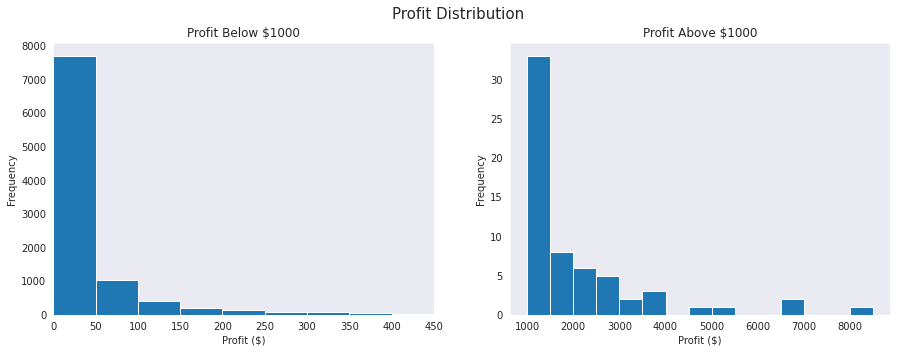

In [26]:
#set figure size for the plots
plt.figure(figsize = (15, 5))

#subplot for profit values below $1000
plt.subplot(1, 2, 1)

#create bin edges
bin_edges1 = np.arange(0, 1000 + 50, 50)

#visualize
plt.hist(data = samp_superstore, x = "Profit", bins = bin_edges1); 
plt.xlim(0, 450)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.title("Profit Below $1000")
plt.grid(False);


#subplot for Profit values above $1000 
plt.subplot(1, 2, 2) 

#create bin edges 
bin_edges2 = np.arange(1000, samp_superstore.Profit.max() + 500, 500)

#visualize 
plt.hist(data = greater_profit, x = "Profit", bins = bin_edges2); 
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.title("Profit Above $1000")
plt.grid(False);

plt.suptitle("Profit Distribution", fontsize = 15);


This could be due to reasons including, segment, product category, product subcategory, region, and quantity amongst others.


Analysis of the Superstore data shows that the majority of purchases are made by consumers across each region.

In [27]:
#create order for region in plot 
region_order = ["West", "East", "Central", "South"]


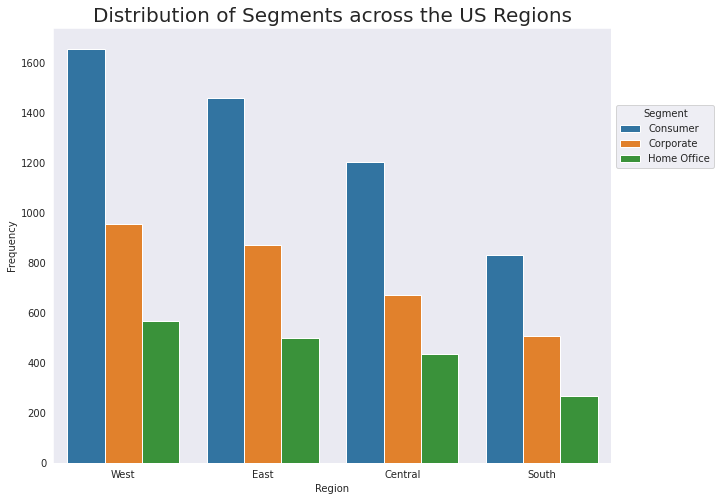

In [28]:
#set figure size 
plt.figure(figsize = (10,8))

#visualize
sb.countplot(data = samp_superstore, x = "Region", hue = "Segment", 
            order = region_order);
plt.legend(title = "Segment", loc = 6, bbox_to_anchor = (1, 0.75))

plt.grid(False)

plt.ylabel("Frequency")
plt.title("Distribution of Segments across the US Regions", fontsize = 20);


and of the various categories of products sold, office supplies are the most purchased. 

In [29]:
#set order of bars 
cat_order = samp_superstore.Category.value_counts().index 

#set color 
base_color = sb.color_palette()[0]


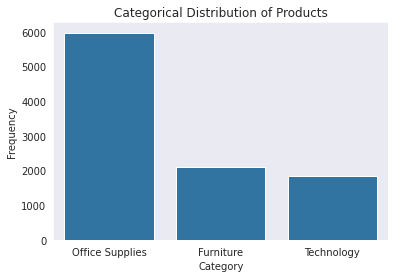

In [30]:
#visualize Category of products sold
sb.countplot(data = samp_superstore, x = "Category", color = base_color, 
            order = cat_order);

plt.grid(False)

plt.ylabel("Frequency") 
plt.title("Categorical Distribution of Products");


But visualization of the Superstore data shows that technological products yield the highest profits, and the majority of office supplies products yield profit within the range of \\$4-30. 

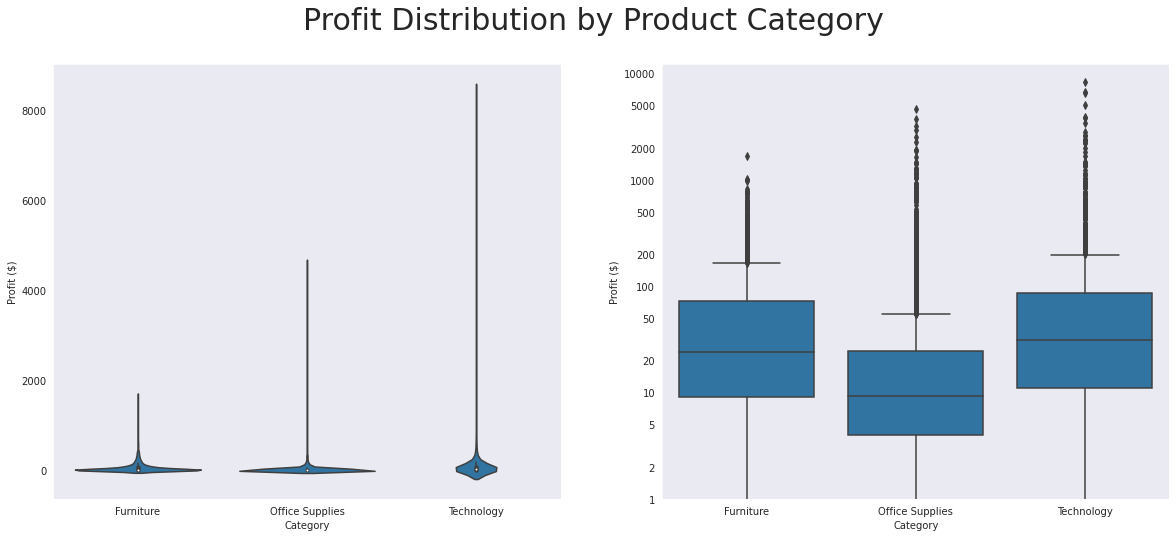

In [31]:
#create figure size 
plt.figure(figsize = (20, 8))

#create subplot for violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = samp_superstore, x = "Category", y = "Profit", 
             color = base_color); 
plt.ylabel("Profit ($)")
plt.grid(False)


#create subplot for box plot 
plt.subplot(1, 2, 2) 
sb.boxplot(data = samp_superstore, x = "Category", y = "Profit", 
             color = base_color); 
plt.yscale("log")

#create ticks for y-axis 
y_ticks = [1, 2, 5, 10, 20, 50, 100,200, 500, 1000, 2000, 5000, 10000]
tick_labels = ["{}".format(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, tick_labels)

plt.grid(False)

plt.ylabel("Profit ($)")
plt.suptitle("Profit Distribution by Product Category", fontsize = 30);


While the number of products purchased plays a role in increasing profit yield, the type of product purchased in terms of sale price also determines the amount of profit that will be generated. According to the analysis, products are mostly purchased in quantities of 2 or 3, and products bought in large quantities are mostly purchased at low prices, therefore yielding low profits. 

In [32]:
#choose color palette 
choice_color = sb.color_palette()[9]


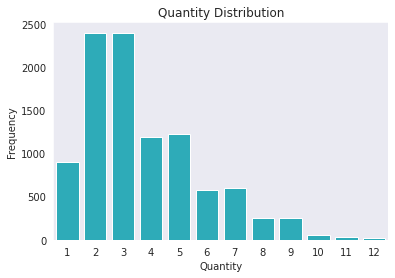

In [33]:
#visual Quantity of products sold
sb.countplot(data = samp_superstore, x = "Quantity", color = choice_color);

plt.grid(False) 

plt.ylabel("Frequency") 
plt.title("Quantity Distribution");


In [34]:
#choose bar color 
color5 = sb.color_palette()[6]


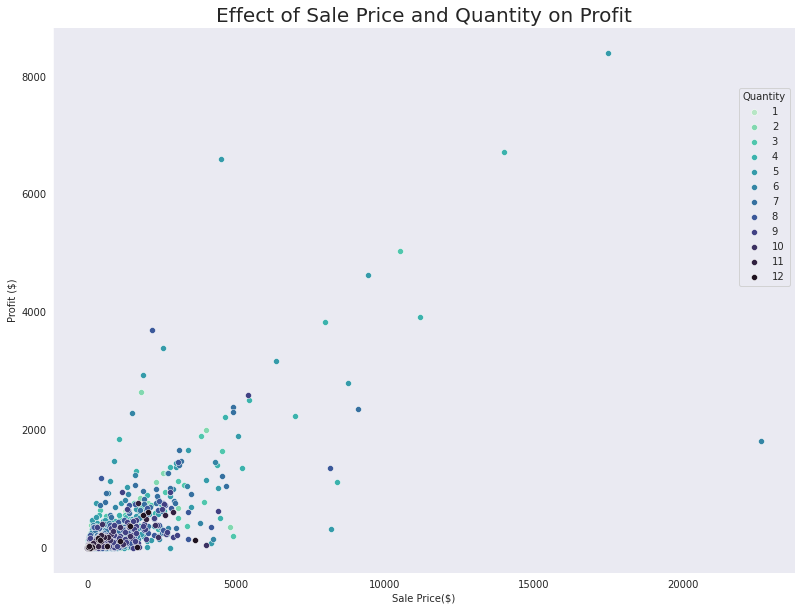

In [35]:
#visualize relationship between sale price, quantity and profit
g = sb.FacetGrid(data = samp_superstore, hue = "Quantity", 
                 palette = "mako_r"); 

g.map(sb.scatterplot, "Sales", "Profit") 

plt.xlabel("Sale Price($)") 
plt.ylabel("Profit ($)")
plt.title("Effect of Sale Price and Quantity on Profit", fontsize = 20)
plt.legend(title = "Quantity", bbox_to_anchor = (1, 0.90)) 

g.figure.set_size_inches(15, 10); 
plt.grid(False)



Visualization of the effect of the sale price and segment on profit shows that while consumers may generally yield higher profits than home office and corporate segments,
majority of the products have a sale price below $5,000 and yield low profits.

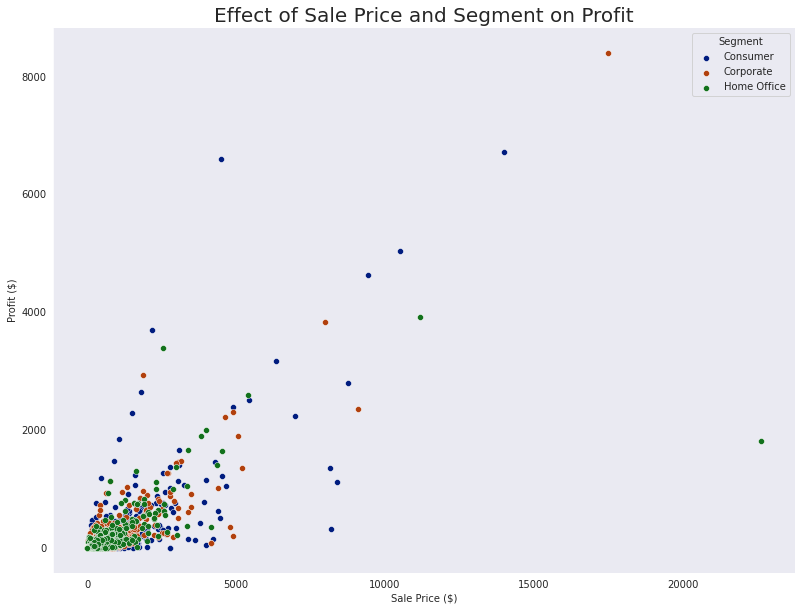

In [36]:
#visualize
g = sb.FacetGrid(data = samp_superstore, hue = "Segment", 
                 palette = "dark"); 

g.map(sb.scatterplot, "Sales", "Profit") 

plt.xlabel("Sale Price ($)") 
plt.ylabel("Profit ($)")
plt.title("Effect of Sale Price and Segment on Profit", fontsize = 20)
plt.legend(title = "Segment") 

g.figure.set_size_inches(15, 10); 
plt.grid(False)
           

Also, of the products purchased in large quantities, binders and papers are the most in demand.

In [37]:
#obtain average quantity at which products were purchased
samp_superstore.Quantity.astype(int).mean()


3.735812922084467

In [38]:
#filter out products purchased in quantities >4 
large_quantities = samp_superstore[samp_superstore["Quantity"].astype(int) > 4]
large_quantities


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,383.0310
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700
10,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,Standard Class,Home Office,Los Angeles,California,90032,West,Office Supplies,Fasteners,13.8600,7,0.00,0.0000
9981,First Class,Consumer,Fairfield,Ohio,45014,East,Office Supplies,Labels,16.5200,5,0.20,5.3690
9982,Standard Class,Consumer,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132
9984,Standard Class,Consumer,Long Beach,New York,11561,East,Office Supplies,Labels,31.5000,10,0.00,15.1200


In [39]:
color_choice = sb.color_palette()[8]

#create order and, obtain count and total sum of products bought 
#in large quantities
product_count = large_quantities.Sub_Category.value_counts()  
product_sum = product_count.sum()
product_order = product_count.index


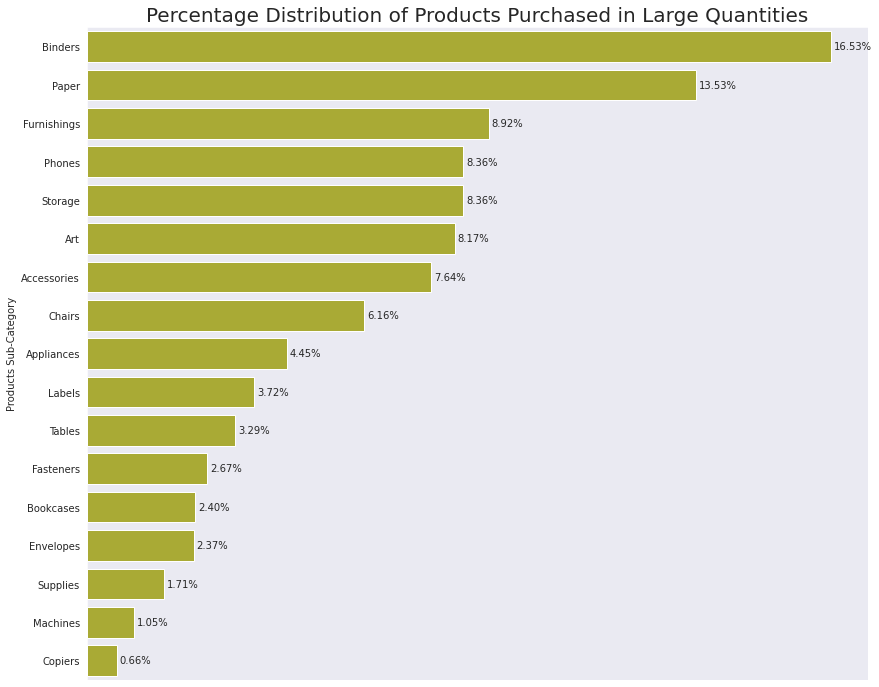

In [40]:
#set figure size
plt.figure(figsize = (14,12))

#visualize products 
g = sb.countplot(data = large_quantities, y = "Sub_Category", color = color_choice,
            order = product_order);

#include percentage text
for i in range(product_count.shape[0]): 
    count = product_count[i]
    percent = "{:0.2f}%".format(100 * (count/product_sum))
    plt.text(count + 2, i, percent, va = "center");

plt.ylabel("Products Sub-Category")
plt.title("Percentage Distribution of Products Purchased in Large Quantities", fontsize = 20)
plt.grid(False) 

#turn of x-axis 
g.get_xaxis().set_visible(False)



In the Central, East, South, and West regions, the most profit is generated from Texas, New York, Virginia, and California respectively.

In [41]:
#obtain total profit yield of each state in each region
total_state_profit = samp_superstore.groupby(["Region", "State"]).Profit.sum()

#create a dataframe from the result obtained above
total_state_profit = total_state_profit.reset_index(name = "Total_Profit") 
total_state_profit


,Region,State,Total_Profit
0,Central,Illinois,26238.6956
1,Central,Indiana,18382.9363
2,Central,Iowa,1183.8119
3,Central,Kansas,836.4435
4,Central,Michigan,19481.7203
5,Central,Minnesota,10823.1874
6,Central,Missouri,6436.2105
7,Central,Nebraska,1649.5266
8,Central,North Dakota,230.1497
9,Central,Oklahoma,4853.9560


In [42]:
#filter out States by their regions
central_state_profit = total_state_profit.query('Region == "Central"')
east_state_profit = total_state_profit.query('Region == "East"')
south_state_profit = total_state_profit.query('Region == "South"')
west_state_profit = total_state_profit.query('Region == "West"')


In [43]:
#obtain the highest profit yield in each region
total_state_profit.groupby("Region").Total_Profit.max() 


Region
Central    47716.9425
East       82766.1540
South      18383.6816
West       81873.8496
Name: Total_Profit, dtype: float64

In [44]:
#obtain order of states in each region 
central_order = central_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index
east_order = east_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index 
south_order = south_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index 
west_order = west_state_profit.groupby("State").Total_Profit.sum().sort_values(ascending = False).index


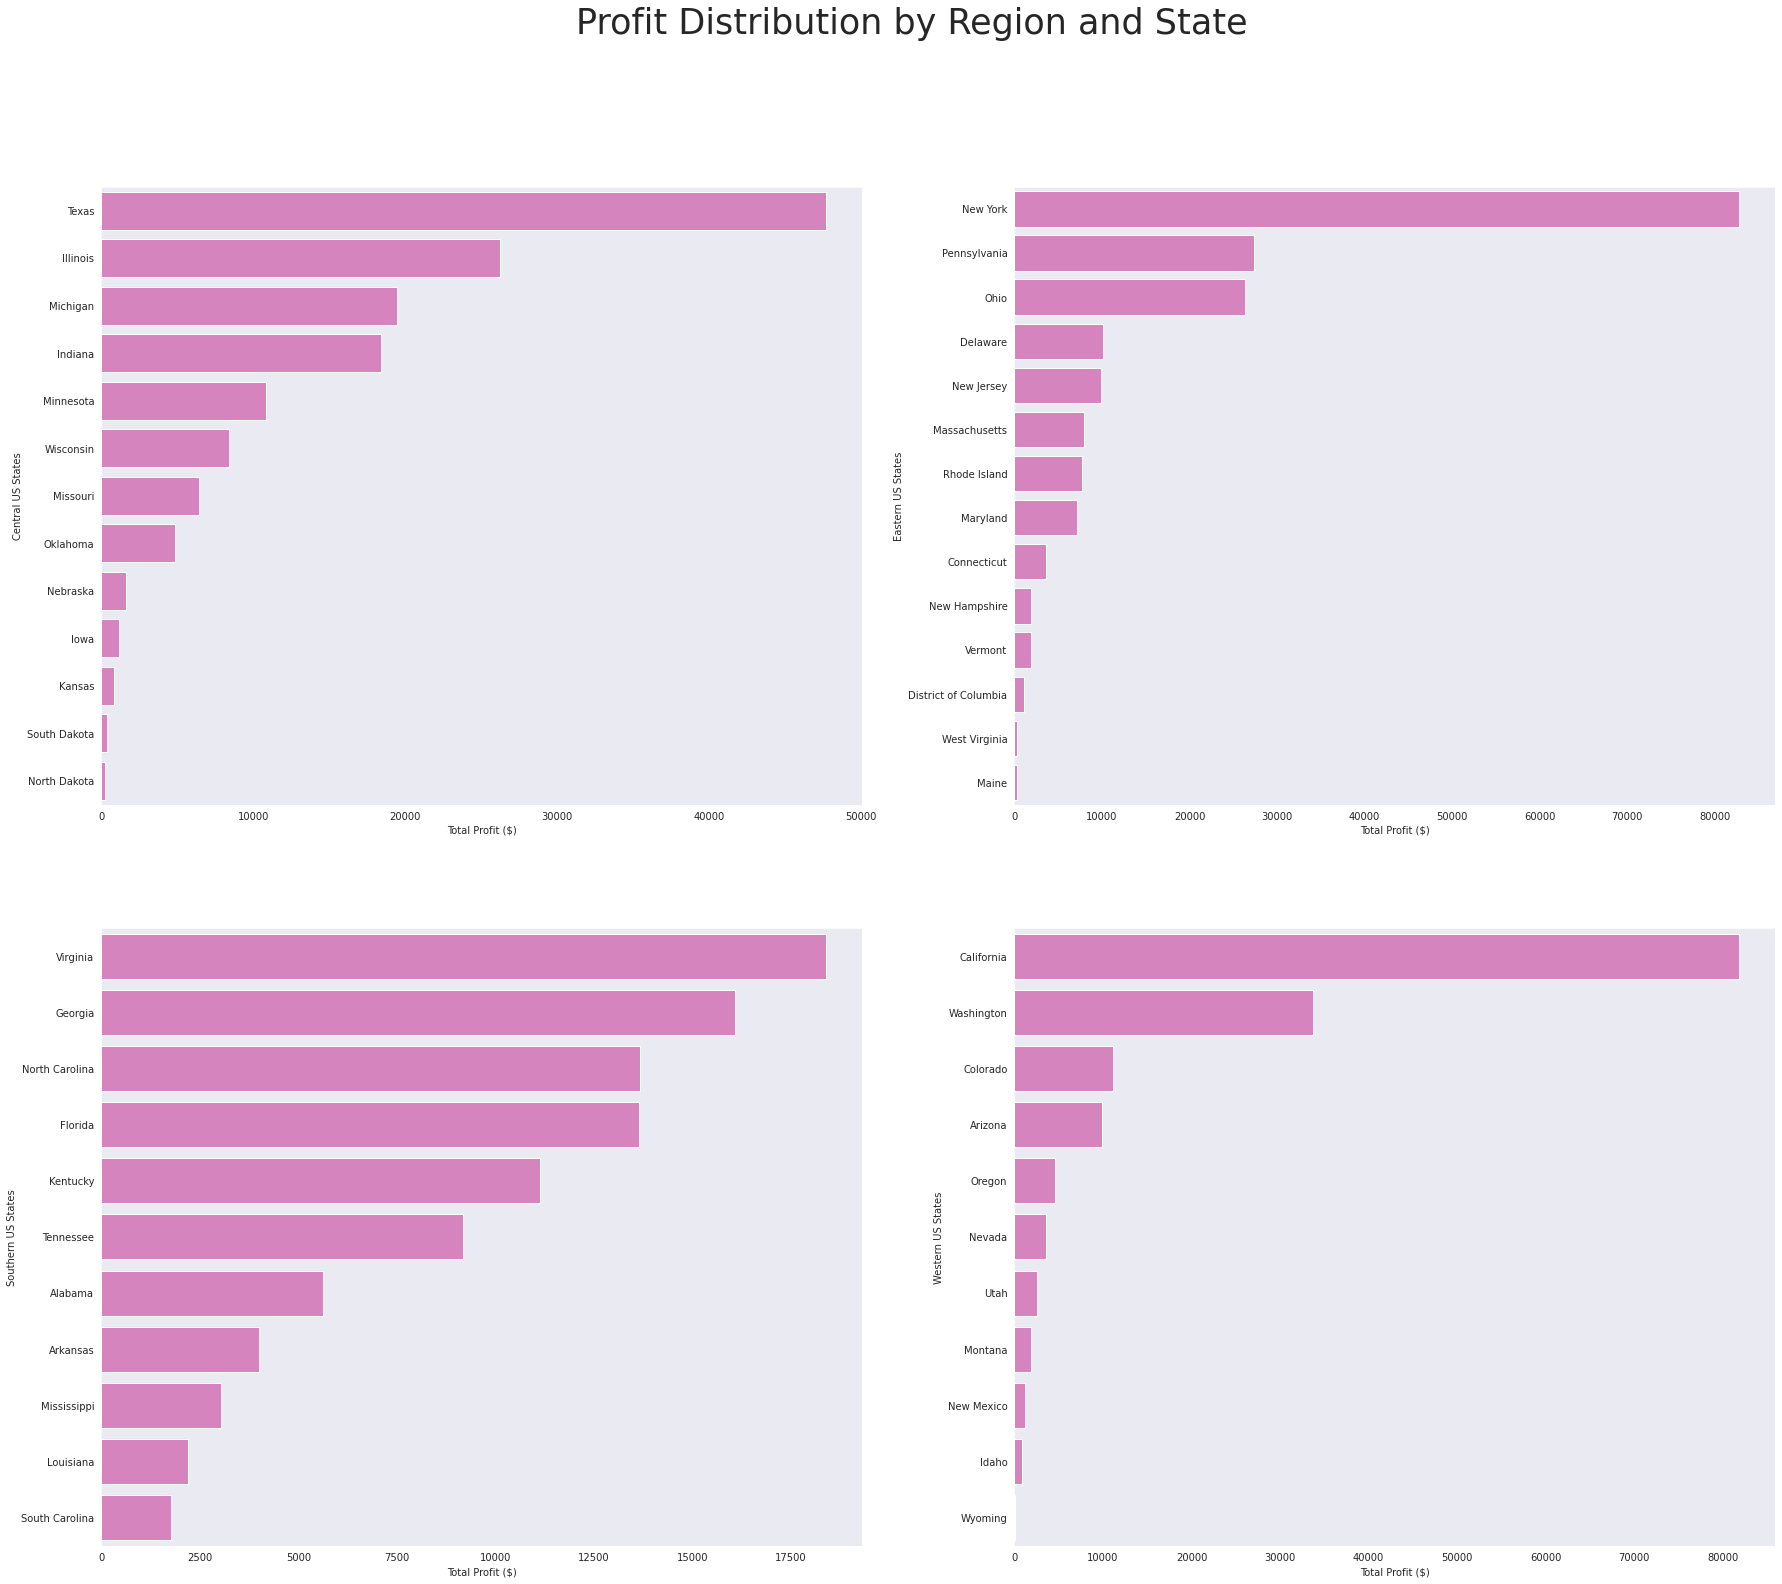

In [45]:
#set figure size
plt.figure(figsize = (30, 25))

#plot for states in the central region
plt.subplot(2, 2, 1) 
sb.barplot(data = central_state_profit, y = "State", x = "Total_Profit",
           order = central_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Central US States")
plt.grid(False)

#plot for states in the east region 
plt.subplot(2, 2, 2) 
sb.barplot(data = east_state_profit, y = "State", x = "Total_Profit", 
           order = east_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Eastern US States")
plt.grid(False) 

#plot for the states in the south region 
plt.subplot(2, 2, 3) 
sb.barplot(data = south_state_profit, y = "State", x = "Total_Profit", 
           order = south_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Southern US States")
plt.grid(False) 

#plot for the states in the west region
plt.subplot(2, 2, 4) 
sb.barplot(data = west_state_profit, y = "State", x = "Total_Profit",
           order = west_order, color = color5)
plt.xlabel("Total Profit ($)")
plt.ylabel("Western US States")
plt.grid(False)

plt.suptitle("Profit Distribution by Region and State", fontsize = 35);


The analysis of the Superstore data also showed that purchases are mostly made by customers residing in the West, and the most profit is generated from Burbank in California.

In [46]:
#choose color 
color4 = sb.color_palette()[5]

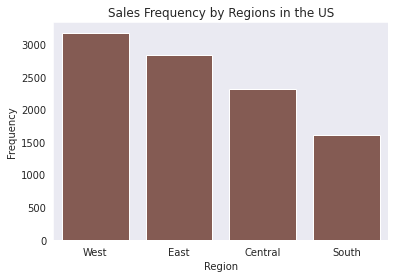

In [47]:
#obtain order 
reg_order = samp_superstore.Region.value_counts().index

#visualize
sb.countplot(data = samp_superstore, x = "Region", color = color4, 
             order = reg_order);

plt.ylabel("Frequency")
plt.title("Sales Frequency by Regions in the US")
plt.grid(False)


In [48]:
#choose color palette 
base_color = sb.color_palette()[0]


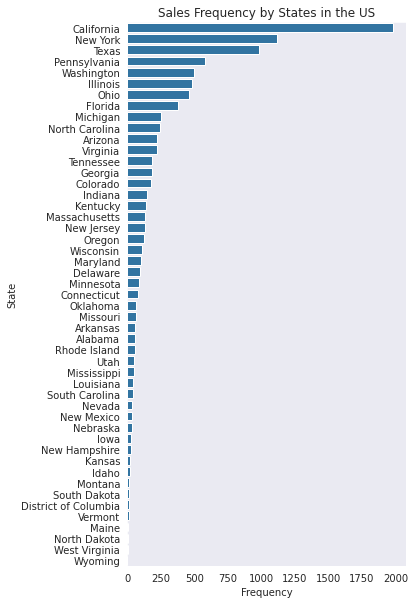

In [49]:
#set figure size
plt.figure(figsize = (5,10))

#set order
state_order = samp_superstore.State.value_counts().index

#visualize State distribution
sb.countplot(data = samp_superstore, y = "State", color = base_color,
            order = state_order); 

plt.xlabel("Frequency")
plt.title("Sales Frequency by States in the US")
plt.grid(False)


In [50]:
#filter out rows with State value as California 
california = samp_superstore.query('State == "California"')
california


,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [51]:
#obtain the average profit generated in each city in California
city_profit_mean = california.groupby("City").Profit.mean()


#order the cities by their average profit in descending order
city_order = city_profit_mean.sort_values(ascending = False).index


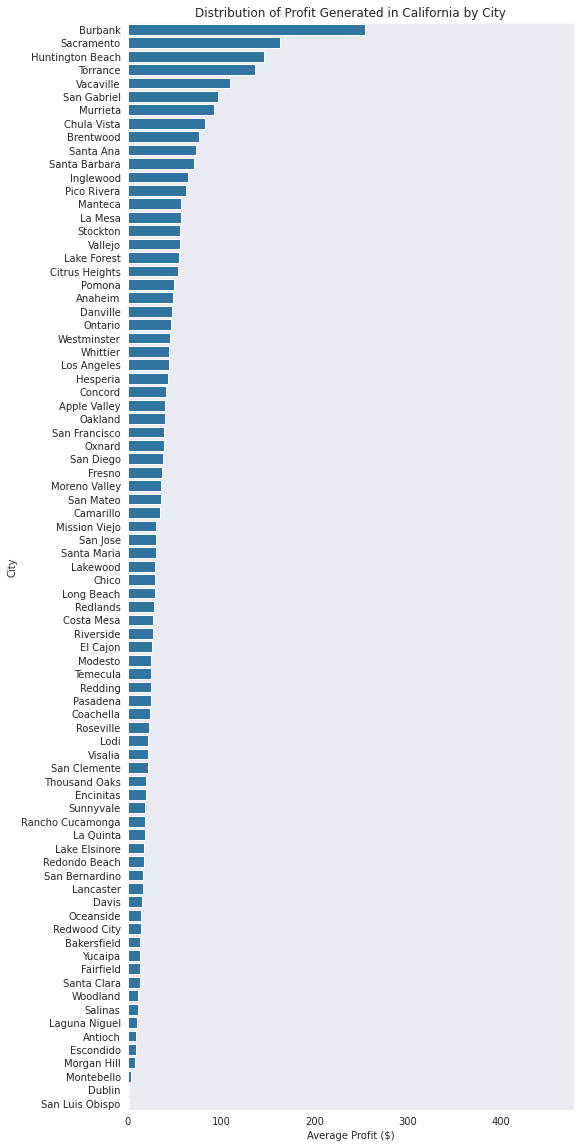

In [52]:
#set size of figure 
plt.figure(figsize = (8, 20)) 

#visualize 
sb.barplot(data = california, y = "City", x = "Profit", 
             color = base_color, errwidth = 0, 
          order = city_order); 
plt.xlabel("Average Profit ($)")
plt.title("Distribution of Profit Generated in California by City")
plt.grid(False)


Lastly, standard class is the most preferred choice of customers for shipping purchases.

In [53]:
#choose color palette 
choice_color = sb.color_palette()[9]


In [54]:
#obtain count for each unique value in Ship _Mode
mode_count = samp_superstore.Ship_Mode.value_counts() 

#obtain total count of Ship_Mode in dataset 
mode_sum = mode_count.sum()


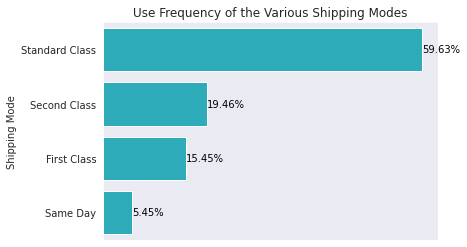

In [55]:
#visualize percentage distribution of Ship_Mode 
g = sb.countplot(data = samp_superstore, y = "Ship_Mode", color = choice_color);

#include percentage text on bars 
for i in range(mode_count.shape[0]): 
    count = mode_count[i]
    prop_str = '{:0.2f}%'.format(100 * count / mode_sum) 
    plt.text(count + 1, i, prop_str, va = "center", color = "black") 

plt.ylabel("Shipping Mode")
plt.title("Use Frequency of the Various Shipping Modes")
plt.grid(False)    

#turn of x-axis 
g.get_xaxis().set_visible(False)


In [56]:
!jupyter nbconvert SuperStore_II.ipynb --to slides --post serve --no-input --no-prompt 


[NbConvertApp] Converting notebook SuperStore_II.ipynb to slides
[NbConvertApp] Writing 1087368 bytes to SuperStore_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/SuperStore_II.slides.html
Use Control-C to stop this server
^C

Interrupted
